# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [104]:
from random import random, seed
from itertools import product, accumulate
import numpy as np

from icecream import ic
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [105]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [106]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [107]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [108]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(251230662.5826106))

In [109]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(124562097.67477982))

### Hill climbing solution

100%|██████████| 20000/20000 [46:03<00:00,  7.24it/s] 
ic| cost(solution): np.float64(34584942.77472002)
ic| history.index(cost(solution)): 19985


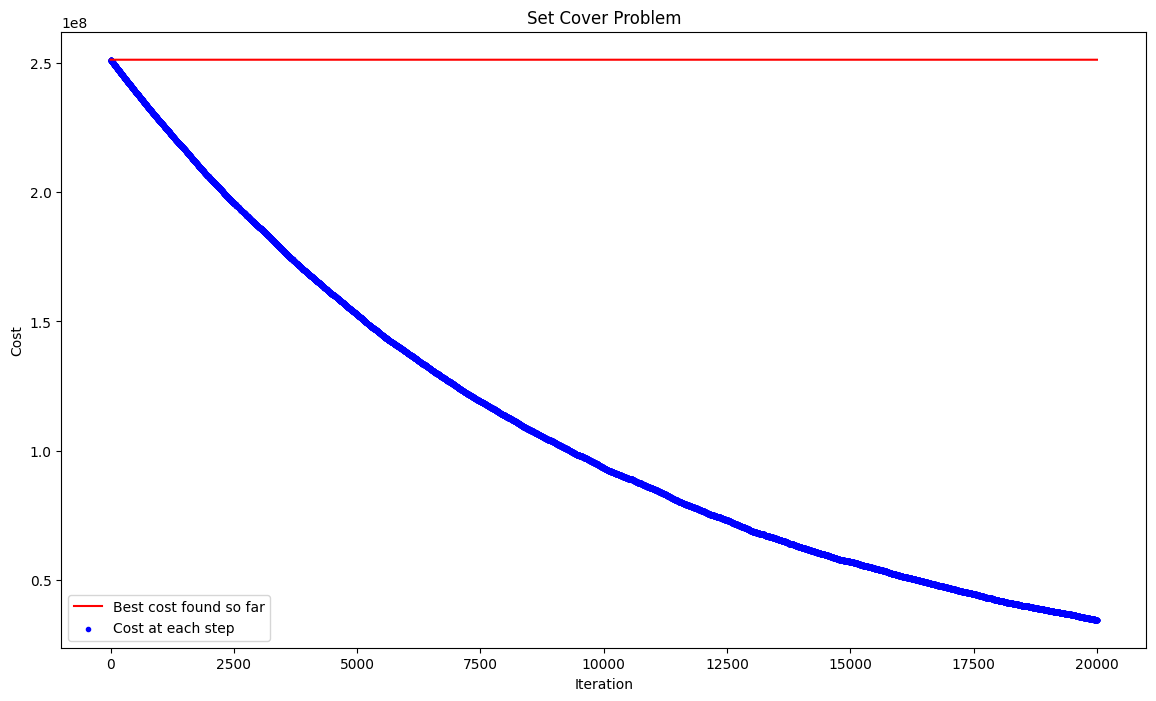

In [110]:
MAX_STEPS = 20_000

# Soluzione con tutti i set inclusi
solution = np.full(NUM_SETS, True)
current_cost = cost(solution)
history = [current_cost]  # Costi

for n in tqdm(range(MAX_STEPS)):
    # TWEAK! - Modifico in modo randomico la soluzione
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_SETS) 
    new_solution[index] = not new_solution[index] 

    if valid(new_solution):
        new_cost = cost(new_solution)
        if new_cost < current_cost:
            solution = new_solution
            current_cost = new_cost
        # Aggiorno history con il costo minore finora trovato
        history.append(min(history[-1], new_cost)) #history[-]] è il valore dell'ultimo costo trovato
    else:
        history.append(history[-1])  # Mantengo lo stesso costo se non valido

ic(cost(solution))
ic(history.index(cost(solution)))

plt.figure(figsize=(14, 8))

# Grafico del costo migliorato nel tempo
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),  # Mostra l'evoluzione del miglior costo
                                    #Visualizzo una linea piatta perchè accumulate mantiene il valore massimo
                                    #raggiunto fino ad ora, quindi se non ci sono miglioramenti significativi
                                    #per molte iterazioni appare una linea piatts
    color="red",
    label='Best cost found so far'
)

# Scatter plot con tutti i costi nel tempo
plt.scatter(range(len(history)), history, marker=".", color="blue", label='Cost at each step')

plt.title("Set Cover Problem")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()

plt.show()
